### TMM optimization

#### thickness + refractive index optimization

In [3]:
%reload_ext autoreload
%autoreload

import numpy as np
from scipy import constants
from Electromagnetics.TMM import *
import math
from numpy.random import random

n_min = 1.0
n_max = 12.0

freq = 100.0*constants.tera
l_min = 0.0#constants.c/freq/n_max/10
l_max = constants.c/freq/n_min


theta = np.linspace(0.0, 60.0*np.pi/180.0, 7)
freqs = np.linspace(0.95*freq, 1.05*freq, 5)

N_layer = 9

n_0, n_1 = 1.0, 1.0

def f_mg(x):
    N = N_layer

    n_arr = np.array(x[0:N])
    d_arr = np.array(x[N:2*N])

    fitness = 0.0
    for i in range(len(theta)):
        for f in freqs:
            pc = TMM_EM_N(f, theta=theta[i], TETM='TE')
            pc.SetupMultilayer(n_0, n_1, n_arr, d_arr)

            T, R = pc.GetTransmissionReflection()
            fitness += abs(R)

    return fitness


from Electromagnetics.Misc import *
from Electromagnetics.EvolAlgs import *

t_0 = tic()

res = geneticAlg(f_mg, intervals=[(n_min, n_max)]*N_layer + [(l_min, l_max)]*N_layer, 
                 n_bits=[10]*2*N_layer, pop_size=100, n_gen=200, pr_cross=0.2, pr_mut=0.5, 
                 pr_bit_mut=0.1, maximize=False, parallel=True)

print('res: \n', res)

print("Processing time:", toc(t_0))



time_start:  38806.45190977
initializing multiprocessing
Start of evolution
-- End of (successful) evolution --
Best individual is [1.096774193548387, 1.3440860215053765, 3.225806451612903, 6.956989247311828, 4.795698924731183, 5.397849462365591, 7.720430107526882, 6.89247311827957, 2.78494623655914, 2.4528473836363637e-06, 5.978266024633431e-07, 2.608165079374389e-07, 2.256502372043011e-07, 8.967399036950147e-07, 2.4323337257086997e-07, 9.670724451612902e-07, 2.0513657927663735e-08, 1.3568319457869013e-06], (10.251703756829514,)
res: 
 [[1.096774193548387, 1.3440860215053765, 3.225806451612903, 6.956989247311828, 4.795698924731183, 5.397849462365591, 7.720430107526882, 6.89247311827957, 2.78494623655914, 2.4528473836363637e-06, 5.978266024633431e-07, 2.608165079374389e-07, 2.256502372043011e-07, 8.967399036950147e-07, 2.4323337257086997e-07, 9.670724451612902e-07, 2.0513657927663735e-08, 1.3568319457869013e-06], 10.251703756829514]
time_end:  39574.95481676
Processing time: 0:12:48


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


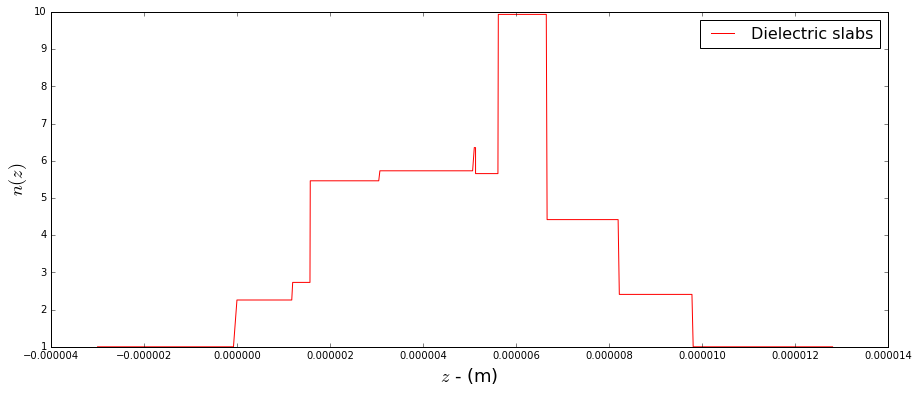

/usr/lib/python3/dist-packages/numpy/core/numeric.py:460: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


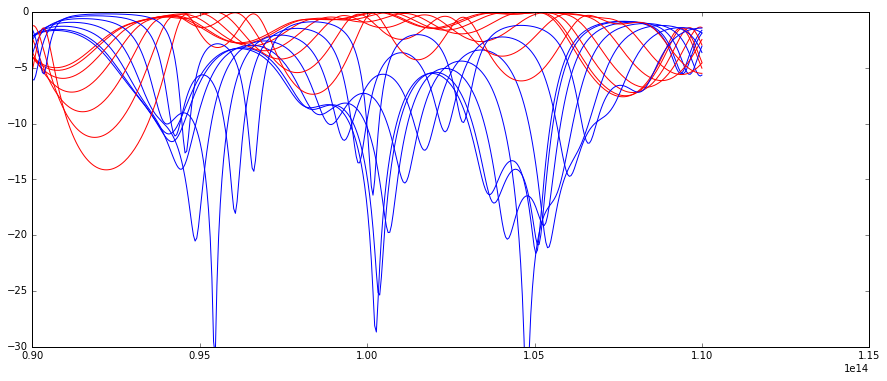

In [2]:
%pylab inline

log_scale = True

N = N_layer
x = res[0]
n_arr = np.array(x[0:N])
d_arr = np.array(x[N:2*N])


d_sides = l_max
n_pts_0, n_pts_1 = 40, 40
n_pts_i = 60

pc = TMM_EM_N(freq, theta=0.0, TETM='TE')
pc.SetupMultilayer(n_0, n_1, n_arr, d_arr)
[z_pts, n_vec] = pc.GetMediumPlot(n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
figsize(15, 6)

fig = figure()
plot(z_pts, np.real(n_vec), 'r', label='Dielectric slabs')

xlabel('$z$ - (m)', fontsize=18)
ylabel('$n(z)$', fontsize=18)
legend(loc='best', fontsize=16)
show()



for i in range(len(theta)):
    pc = TMM_EM_N(freq, theta=theta[i], TETM='TE')
    pc.SetupMultilayer(n_0, n_1, n_arr, d_arr)

    f_0 = freq*0.9
    f_1 = freq*1.1
    N = 400

    f, T, R = pc.GetTransmissionReflectionFreqBand(f_0, f_1, N)

    figsize(15, 6)
    
    if log_scale:
        plot(f, 20.0*np.log10(T), 'r', label='$T$')
        plot(f, 20.0*np.log10(R), 'b', label='$R$')
        gca().set_ylim([-30.0, 0.0])
    else:
        plot(f, abs(T), 'r', label='$T$')
        plot(f, abs(R), 'b', label='$R$')
        gca().set_ylim([0.0, 1.0])


#### only thickness optimization (preset dielectric constants)

In [4]:
%reload_ext autoreload
%autoreload

import numpy as np
from scipy import constants
from Electromagnetics.TMM import *
import math
from numpy.random import random

n_min = 1.5
n_max = 3.0

freq = 100.0*constants.tera
l_min = 0.0#constants.c/freq/n_max/10
l_max = constants.c/freq/n_min


theta = np.linspace(0.0, 80.0*np.pi/180.0, 9)

N_layer = 12

n_0, n_1 = 1.0, 1.0

def f_mg(x):
    N = N_layer
    
    n_arr = np.array([n_min, n_max]*N)
    d_arr = np.array(x[0:2*N])

    fitness = 0.0
    for i in range(len(theta)):
        pc = TMM_EM_N(freq, theta=theta[i], TETM='TE')
        pc.SetupMultilayer(n_0, n_1, n_arr, d_arr)
        
        T, R = pc.GetTransmissionReflection()
        fitness += abs(R)

    return fitness


from Electromagnetics.Misc import *
from Electromagnetics.EvolAlgs import *

t_0 = tic()

res = geneticAlg(f_mg, intervals=[(l_min, l_max)]*2*N_layer, 
                 n_bits=[10]*2*N_layer, pop_size=400, n_gen=500, pr_cross=0.2, pr_mut=0.5, 
                 pr_bit_mut=0.1, maximize=False, parallel=True)

print('res: \n', res)

print("Processing time:", toc(t_0))



time_start:  23715.234873271
initializing multiprocessing
Start of evolution
-- End of (successful) evolution --
Best individual is [4.552078378233952e-07, 9.787945354056697e-07, 1.5101959598175302e-06, 1.2894299268817204e-07, 1.2405878841968067e-06, 1.8403681683675464e-06, 1.197606886634083e-06, 1.2405878841968067e-06, 1.3871140122515478e-07, 4.024584317236885e-07, 1.058895485408928e-06, 3.5166270733137833e-07, 3.907363414793092e-09, 1.4457244634734442e-07, 1.308966743955686e-07, 7.072327780775498e-07, 1.054988121994135e-06, 1.0256828963831867e-06, 1.9732185244705117e-07, 1.0159144878462041e-07, 9.885629439426525e-07, 1.9908016598370806e-06, 3.0477434635386123e-07, 5.29447742704464e-07], (1.5931014748585111,)
res: 
 [[4.552078378233952e-07, 9.787945354056697e-07, 1.5101959598175302e-06, 1.2894299268817204e-07, 1.2405878841968067e-06, 1.8403681683675464e-06, 1.197606886634083e-06, 1.2405878841968067e-06, 1.3871140122515478e-07, 4.024584317236885e-07, 1.058895485408928e-06, 3.5166270733

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


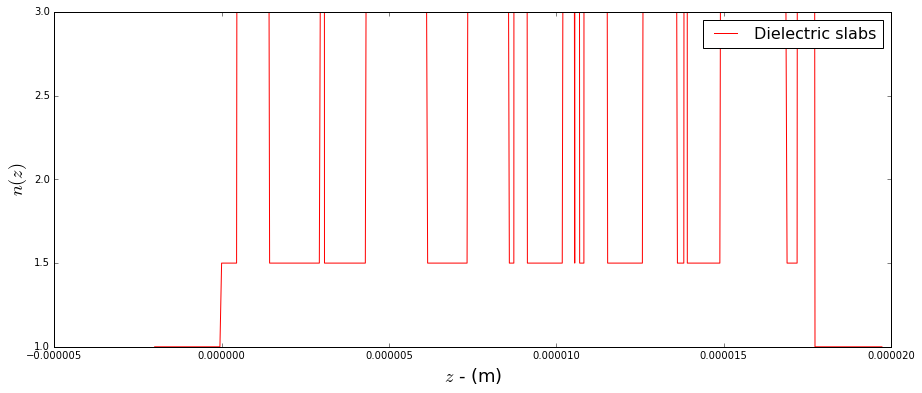

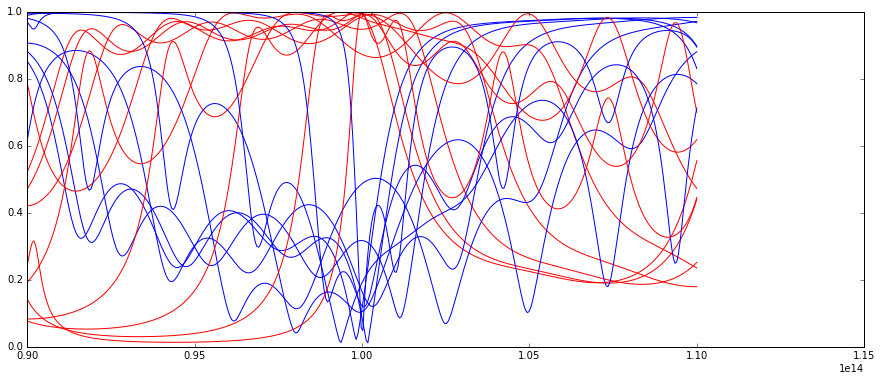

In [5]:
%pylab inline

log_scale = False

N = N_layer
x = res[0]
n_arr = np.array([n_min, n_max]*N)
d_arr = np.array(x[0:2*N])


d_sides = l_max
n_pts_0, n_pts_1 = 40, 40
n_pts_i = 60

pc = TMM_EM_N(freq, theta=0.0, TETM='TE')
pc.SetupMultilayer(n_0, n_1, n_arr, d_arr)
[z_pts, n_vec] = pc.GetMediumPlot(n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
figsize(15, 6)

fig = figure()
plot(z_pts, np.real(n_vec), 'r', label='Dielectric slabs')

xlabel('$z$ - (m)', fontsize=18)
ylabel('$n(z)$', fontsize=18)
legend(loc='best', fontsize=16)
show()

for i in range(len(theta)):
    pc = TMM_EM_N(freq, theta=theta[i], TETM='TE')
    pc.SetupMultilayer(n_0, n_1, n_arr, d_arr)

    f_0 = freq*0.9
    f_1 = freq*1.1
    N = 400

    f, T, R = pc.GetTransmissionReflectionFreqBand(f_0, f_1, N)

    figsize(15, 6)
    
    if log_scale:
        plot(f, 20.0*np.log10(T), 'r', label='$T$')
        plot(f, 20.0*np.log10(R), 'b', label='$R$')
        gca().set_ylim([-30.0, 0.0])
    else:
        plot(f, abs(T), 'r', label='$T$')
        plot(f, abs(R), 'b', label='$R$')
        gca().set_ylim([0.0, 1.0])


### single/multiple slab scattering

Populating the interactive namespace from numpy and matplotlib


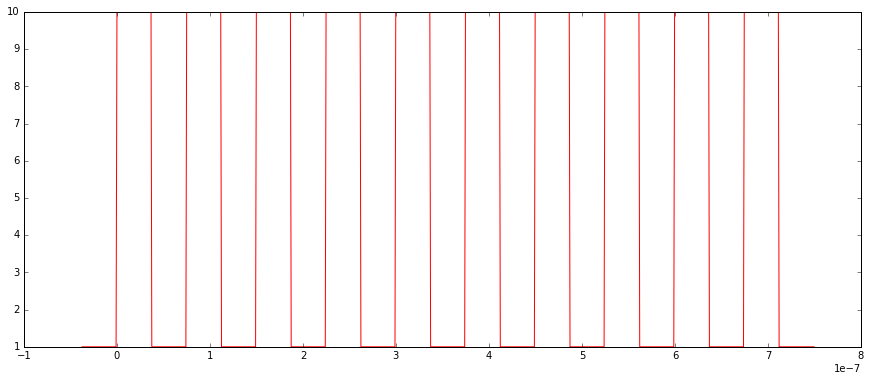

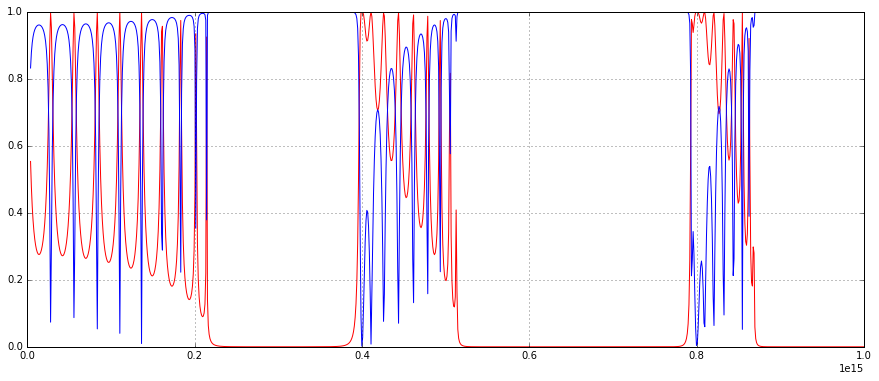

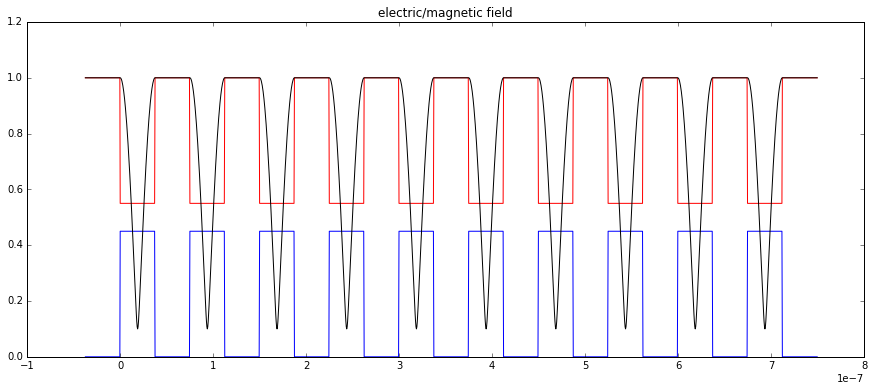

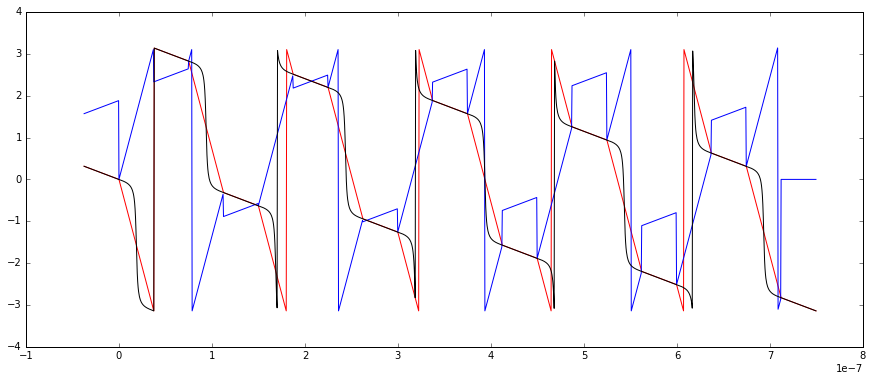

In [1]:
%pylab inline

import numpy as np
from scipy import constants
from Electromagnetics.TMM import *
import math

log_scale = False

n = 10.0

freq = 400.0*constants.tera
l_n =1.0*constants.c/freq/n/2
l_period = 2.0*l_n

theta = 0.0/180.0*np.pi
N_layer = 10

n_0, n_1 = 1.0, 1.0

TETM = 'TE'
pc = TMM_EM_N(freq, theta=theta, TETM=TETM)
n_arr, d_arr = pc.RepeatProfile([n, n_0], [l_n, l_period-l_n], N_layer)
if N_layer>1:
    n_arr, d_arr = n_arr.tolist(), d_arr.tolist()
del n_arr[-1]
del d_arr[-1]
d_tot = np.sum(d_arr)
pc.SetupMultilayer(n_0, n_1, n_arr, d_arr)


d_sides = l_n
n_pts_0, n_pts_1 = 40, 40
n_pts_i = 45


figsize(15, 6)
[z_pts, n_vec] = pc.GetMediumPlot(n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
plot(z_pts, np.real(n_vec), 'r', label='Dielectric slabs')
show()

f_0 = freq*0.01
f_1 = freq*2.5
N = 1000

f, T, R = pc.GetTransmissionReflectionFreqBand(f_0, f_1, N)

figsize(15, 6)

if log_scale:
    plot(f, 20.0*np.log10(T), 'r', label='$T$')
    plot(f, 20.0*np.log10(R), 'b', label='$R$')
    gca().set_ylim([-45.0, 0.0])
else:
    plot(f, abs(T), 'r', label='$T$')
    plot(f, abs(R), 'b', label='$R$')
    gca().set_ylim([0.0, 1.0])
grid()
show()

pc.SetFrequency(freq)
[z_pts, E_FWD, E_BWD] = pc.GetFieldPlot(100, 80, 100, d0=l_n, d1=l_n, EH='Et')

plot(z_pts, np.abs(E_FWD), 'r', label='forward')
plot(z_pts, np.abs(E_BWD), 'b', label='backward')
plot(z_pts, np.abs(E_FWD+E_BWD), 'k', label='total')
title('electric/magnetic field')
show()

plot(z_pts, np.angle(E_FWD), 'r', label='forward')
plot(z_pts, np.angle(E_BWD), 'b', label='backward')
plot(z_pts, np.angle(E_FWD+E_BWD), 'k', label='total')
show()


### fit the simplest multiple resonance lorentzian medium - epsilon

In [29]:
from scipy.optimize import newton, fsolve, leastsq, fmin, fmin_cg, minimize
import sys

f_0 = freq*0.1
f_1 = freq*1.1
N = 200

f, T, R = pc.GetTransmissionReflectionFreqBand(f_0, f_1, N)

l_eff = d_tot
#eps_eff = 1 + Sum A_n*f_n**2/(f_n**2-f**2)
N_lz = 2 #number of Lorentz oscilaltors
theta_lz = theta
print('l_eff:', l_eff)
print('N_lz:', N_lz, 'theta_lz:', theta*180.0/np.pi)

X_inf_p = 1.0e4
X_inf_m = -1.0e3
df_small = 1.0e-1
n_small = 1.0e-7

def f_multlorentz(x):
    N = N_lz
    A_arr = np.array(x[0:N])
    fn_arr = np.array(x[N:2*N])
    
    
    eps_eff = np.ones(len(f))
    for i in range(N):
        X_i = (A_arr[i]*fn_arr[i]**2/(fn_arr[i]**2 - f**2))*(np.abs(f-fn_arr[i])>=df_small) + \
            X_inf_p*(np.abs(f-fn_arr[i])<df_small)
        X_i = X_i*(X_i<=X_inf_p)*(X_i>=X_inf_m) + X_inf_p*(X_i>X_inf_p) + X_inf_m*(X_i<X_inf_m)
        eps_eff += X_i
        
    n_eff = np.sqrt(eps_eff + 0j)
    #n_eff = n_eff*(np.imag(n_eff)==0.0) - n_eff*(np.imag(n_eff)>0)
    n_eff = np.real(n_eff) - 1j*np.imag(n_eff)*np.sign(np.imag(n_eff))

    fitness = 0.0
    for i in range(len(f)):
        if np.abs(n_eff[i])<n_small:
            continue
        pc_eff = TMM_EM_N(f[i], theta=theta_lz, TETM=TETM)
        pc_eff.SetupMultilayer(n_0, n_1, [n_eff[i]], [l_eff])

        T_i, R_i = pc_eff.GetTransmissionReflection()
        fitness += np.abs(T[i] - T_i) + np.abs(R[i] - R_i)
    
    return fitness


from Electromagnetics.Misc import *
minimizer = 'GA'
t_0 = tic()

if minimizer!='GA':
    res = minimize(f_multlorentz, np.array([n**2/10, f_1*2.0]), method='Nelder-Mead')
    print('fmin res:', res)
    res = [res, f_multlorentz(res)]

else:
    from Electromagnetics.EvolAlgs import *

    n_max = n+5.0
    fn_max = 1.5*f_1
    fn_min = 0.4*f_1
    print('n_max:', n_max, 'f_max:', f_max)
    sys.stdout.flush()

    res = geneticAlg(f_multlorentz, intervals=[(0, n_max**2)]*N_lz + [(fn_min, fn_max)]*N_lz, 
                     n_bits=[9]*2*N_lz, pop_size=150, n_gen=200, pr_cross=0.2, pr_mut=0.3, 
                     pr_bit_mut=0.1, maximize=False, parallel=True)

    print('res: \n', res)

print("Processing time:", toc(t_0))


l_eff: 7.1200708775e-07
N_lz: 2 theta_lz: 0.0
time_start:  16257.081325575
n_max: 12.0 f_max: 418000000000000.06
initializing multiprocessing
Start of evolution
-- End of (successful) evolution --
Best individual is [143.43639921722112, 43.3972602739726, 229988258317025.5, 628743639921722.2], (118.06110034893261,)
res: 
 [[143.43639921722112, 43.3972602739726, 229988258317025.5, 628743639921722.2], 118.06110034893261]
time_end:  17620.516893192
Processing time: 0:22:43


n_eff: (long wavelength) 7.10633520178


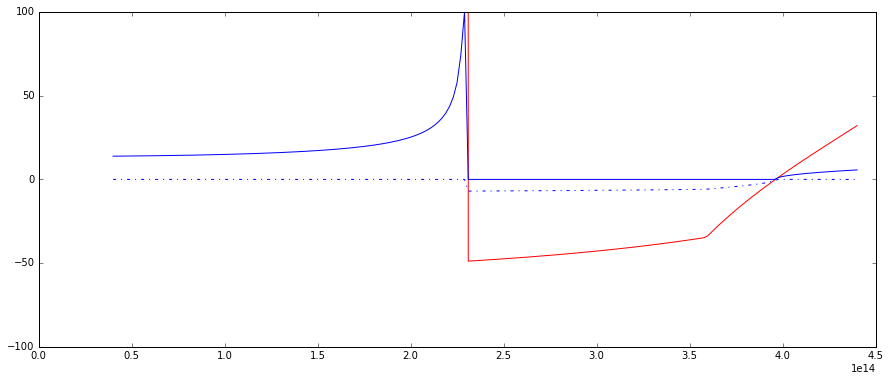

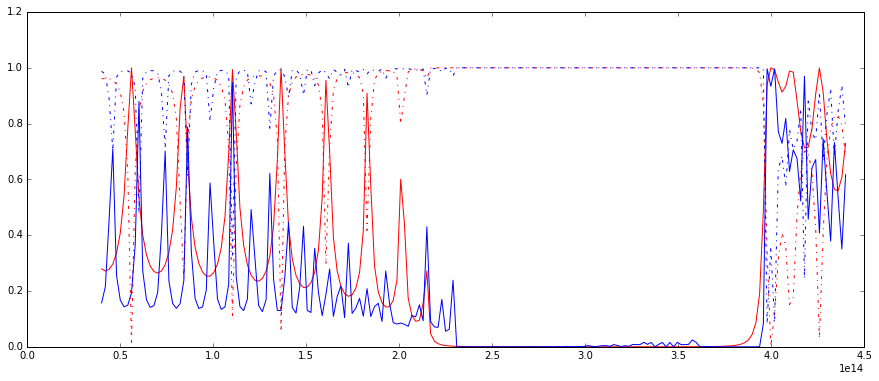

In [30]:
print('n_eff: (long wavelength)', np.sqrt((n**2+1.0)/2))

x = res[0]
N = N_lz
A_arr = np.array(x[0:N])
fn_arr = np.array(x[N:2*N])

eps_eff = np.ones(len(f))
for i in range(N):
    X_i = (A_arr[i]*fn_arr[i]**2/(fn_arr[i]**2 - f**2))*(np.abs(f-fn_arr[i])>=df_small) + \
        X_inf*(np.abs(f-fn_arr[i])<df_small)
    X_i = X_i*(X_i<=X_inf_p)*(X_i>=X_inf_m) + X_inf_p*(X_i>X_inf_p) + X_inf_m*(X_i<X_inf_m)
    eps_eff += X_i
    
n_eff = np.sqrt(eps_eff + 0j)
n_eff = np.real(n_eff) - 1j*np.imag(n_eff)*np.sign(np.imag(n_eff))

plot(f, eps_eff, 'r')
plot(f, np.real(n_eff), 'b')
plot(f, np.imag(n_eff), 'b-.')
gca().set_ylim([-100.0, 100.0])
show()


T_eff, R_eff = np.zeros(len(f), dtype=complex), np.zeros(len(f), dtype=complex)
for i in range(len(f)):
    if np.abs(n_eff[i])<n_small:
        continue
    pc_eff = TMM_EM_N(f[i], theta=theta_lz, TETM=TETM)
    pc_eff.SetupMultilayer(n_0, n_1, [n_eff[i]], [l_eff])
    #pc_eff.SetupMultilayer(n_0, n_1, [np.sqrt((n**2+1)/2)], [l_eff])

    T_i, R_i = pc_eff.GetTransmissionReflection()
    T_eff[i] = T_i
    R_eff[i] = R_i
    
plot(f, np.abs(T), 'r')
plot(f, np.abs(R), 'r-.')
plot(f, np.abs(T_eff), 'b')
plot(f, np.abs(R_eff), 'b-.')
#gca().set_ylim([0.0, 1.5])
show()



### fit the simplest multiple resonance lorentzian medium - epsilon-mu

In [23]:
from scipy.optimize import newton, fsolve, leastsq, fmin, fmin_cg, minimize
import scipy
import sys

f_0 = freq*0.1
f_1 = freq*1.1
N = 300

f, T, R = pc.GetTransmissionReflectionFreqBand(f_0, f_1, N)

l_eff = d_tot
#eps_eff = 1 + Sum A_n*f_n**2/(f_n**2-f**2)
N_lz = 1 #number of Lorentz oscilaltors
theta_lz = theta
print('l_eff:', l_eff)
print('N_lz:', N_lz, 'theta_lz:', theta*180.0/np.pi)

X_ee_inf_p = 1.0e3
X_ee_inf_m = -1.0e3
X_mm_inf_p = 1.0e3
X_mm_inf_m = -1.0e3
df_small = 1.0e0
eps_small = 1.0e-7
mu_small = 1.0e-7

def f_multlorentz(x, vecfit=False):
    N = N_lz
    A_eps_arr = np.array(x[0:N])
    A_mu_arr = np.array(x[N:2*N])
    fn_eps_arr = np.array(x[2*N:3*N])
    fn_mu_arr = np.array(x[3*N:4*N])
        
    eps_eff = np.ones(len(f))
    mu_eff = np.ones(len(f))
    for i in range(N):
        X_ee_i = (A_eps_arr[i]*fn_eps_arr[i]**2/(fn_eps_arr[i]**2 - f**2))*(np.abs(f-fn_eps_arr[i])>=df_small) + \
            X_ee_inf_p*(np.abs(f-fn_eps_arr[i])<df_small)
        X_ee_i = X_ee_i*(X_ee_i<=X_ee_inf_p)*(X_ee_i>=X_ee_inf_m) + X_ee_inf_p*(X_ee_i>X_ee_inf_p) \
            + X_ee_inf_m*(X_ee_i<X_ee_inf_m)
        eps_eff += X_ee_i
        X_mm_i = (A_mu_arr[i]*fn_mu_arr[i]**2/(fn_mu_arr[i]**2 - f**2))*(np.abs(f-fn_mu_arr[i])>=df_small) + \
            X_mm_inf_p*(np.abs(f-fn_mu_arr[i])<df_small)
        X_mm_i = X_mm_i*(X_mm_i<=X_mm_inf_p)*(X_mm_i>=X_mm_inf_m) + X_mm_inf_p*(X_mm_i>X_mm_inf_p) \
            + X_mm_inf_m*(X_mm_i<X_mm_inf_m)
        mu_eff += X_mm_i
        
    if not vecfit:
        fitness = 0.0
        for i in range(len(f)):
            if np.abs(eps_eff[i])<eps_small or np.abs(mu_eff[i])<mu_small:
                continue
            pc_eff = TMM_EM_EPSMU(f[i], theta=theta_lz, TETM=TETM)
            pc_eff.SetupMultilayer((1.0, 1.0), (1.0, 1.0), [eps_eff[i]], [mu_eff[i]], [l_eff])

            T_i, R_i = pc_eff.GetTransmissionReflection()
            fitness += np.abs(T[i] - T_i) + np.abs(R[i] - R_i)

        return fitness
    else:
        fitness = np.zeros(len(f))
        for i in range(len(f)):
            if np.abs(eps_eff[i])<eps_small or np.abs(mu_eff[i])<mu_small:
                continue
            pc_eff = TMM_EM_EPSMU(f[i], theta=theta_lz, TETM=TETM)
            pc_eff.SetupMultilayer((1.0, 1.0), (1.0, 1.0), [eps_eff[i]], [mu_eff[i]], [l_eff])

            T_i, R_i = pc_eff.GetTransmissionReflection()
            fitness[i] = T_i - T[i]

        return fitness


from Electromagnetics.Misc import *
minimizer = 'GA'
t_0 = tic()
res = None

n_max = n+5.0
fn_max = 10.0*f_1
fn_min = 0.1*f_1
print('n_max:', n_max, 'fn_min:', fn_min/f_1, 'fn_max:', fn_max/f_1)
sys.stdout.flush()

if minimizer!='GA':
    f_lsq = lambda x: f_multlorentz(x, vecfit=True)
    res = leastsq(f_lsq, np.array([0.0]*2*N_lz+[fn_max]*2*N_lz))
    print('fmin res:', res)
    #res = [res, f_multlorentz(res)]

else:
    from Electromagnetics.EvolAlgs import *

    res = geneticAlg(f_multlorentz, intervals=[(0, n_max**2)]*2*N_lz + [(fn_min, fn_max)]*2*N_lz, 
                     n_bits=[8]*2*N_lz+[10]*2*N_lz, pop_size=200, n_gen=300, pr_cross=0.2, pr_mut=0.3, 
                     pr_bit_mut=0.1, maximize=False, parallel=True)

    print('res: \n', res)

print("Processing time:", toc(t_0))


l_eff: 7.1200708775e-07
N_lz: 1 theta_lz: 0.0
time_start:  18886.652505204
n_max: 15.0 fn_min: 0.1 fn_max: 10.0
initializing multiprocessing


/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:36: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in less_equal
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in true_divide


Start of evolution
-- End of (successful) evolution --
Best individual is [56.470588235294116, 0.0, 721032258064516.2, 3237548387096774.5], (205.06105163832535,)
res: 
 [[56.470588235294116, 0.0, 721032258064516.2, 3237548387096774.5], 205.06105163832535]
time_end:  24884.094777189
Processing time: 1:39:57


n_eff: (long wavelength) 7.10633520178


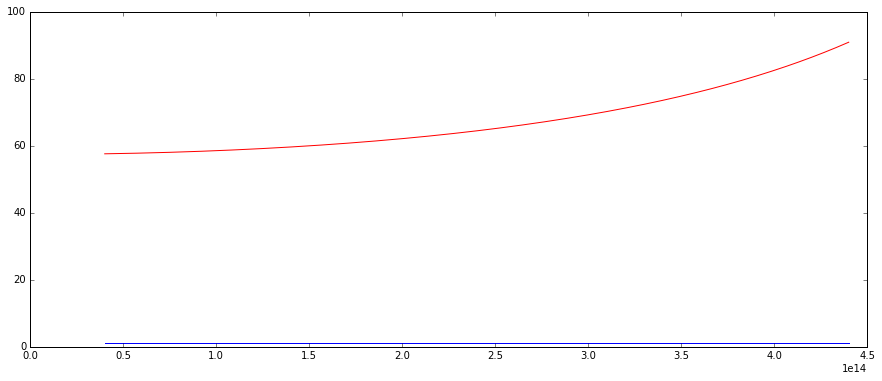

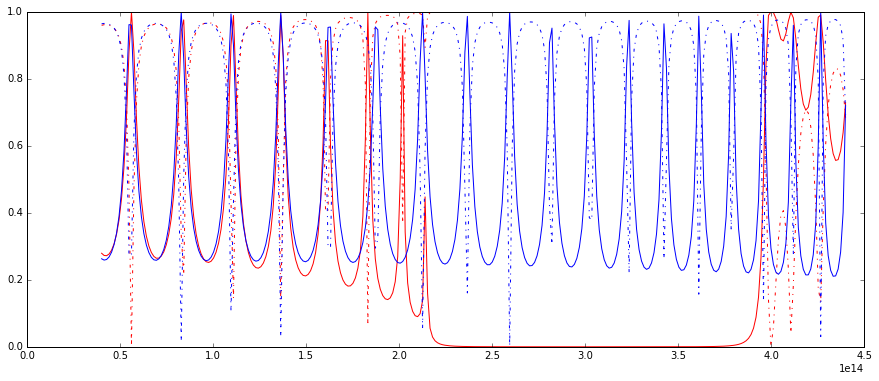

In [24]:
print('n_eff: (long wavelength)', np.sqrt((n**2+1.0)/2))

x = res[0]
N = N_lz
A_eps_arr = np.array(x[0:N])
A_mu_arr = np.array(x[N:2*N])
fn_eps_arr = np.array(x[2*N:3*N])
fn_mu_arr = np.array(x[3*N:4*N])

eps_eff = np.ones(len(f))
mu_eff = np.ones(len(f))
for i in range(N):
    X_ee_i = (A_eps_arr[i]*fn_eps_arr[i]**2/(fn_eps_arr[i]**2 - f**2))*(np.abs(f-fn_eps_arr[i])>=df_small) + \
        X_ee_inf_p*(np.abs(f-fn_eps_arr[i])<df_small)
    X_ee_i = X_ee_i*(X_ee_i<=X_ee_inf_p)*(X_ee_i>=X_ee_inf_m) + X_ee_inf_p*(X_ee_i>X_ee_inf_p) \
        + X_ee_inf_m*(X_ee_i<X_ee_inf_m)
    eps_eff += X_ee_i
    X_mm_i = (A_mu_arr[i]*fn_mu_arr[i]**2/(fn_mu_arr[i]**2 - f**2))*(np.abs(f-fn_mu_arr[i])>=df_small) + \
        X_mm_inf_p*(np.abs(f-fn_mu_arr[i])<df_small)
    X_mm_i = X_mm_i*(X_mm_i<=X_mm_inf_p)*(X_mm_i>=X_mm_inf_m) + X_mm_inf_p*(X_mm_i>X_mm_inf_p) \
        + X_mm_inf_m*(X_mm_i<X_mm_inf_m)
    mu_eff += X_mm_i
    
plot(f, eps_eff, 'r')
plot(f, mu_eff, 'b')
#plot(f, np.imag(n_eff), 'b-.')
#gca().set_ylim([-100.0, 100.0])
show()


T_eff, R_eff = np.zeros(len(f), dtype=complex), np.zeros(len(f), dtype=complex)
for i in range(len(f)):
    if np.abs(eps_eff[i])<eps_small or np.abs(mu_eff[i])<mu_small:
        continue
    pc_eff = TMM_EM_EPSMU(f[i], theta=theta_lz, TETM=TETM)
    pc_eff.SetupMultilayer((1.0, 1.0), (1.0, 1.0), [eps_eff[i]], [mu_eff[i]], [l_eff])

    T_i, R_i = pc_eff.GetTransmissionReflection()
    T_eff[i] = T_i
    R_eff[i] = R_i
    
plot(f, np.abs(T), 'r')
plot(f, np.abs(R), 'r-.')
plot(f, np.abs(T_eff), 'b')
plot(f, np.abs(R_eff), 'b-.')
#gca().set_ylim([0.0, 1.5])
show()

